In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from time import time
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
from numpy import sort



In [ ]:
data = pd.read_csv('microbes.csv')

In [ ]:
data.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [ ]:
print(f'Dataset shape: {data.shape}')

Dataset shape: (30527, 26)


In [ ]:
data.dtypes

Unnamed: 0           int64
Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

In [ ]:
data.describe()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.00000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,15263.00000,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,...,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,8812.53017,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,...,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7631.50000,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,...,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,15263.00000,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,...,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,22894.50000,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,...,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,30526.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


Missing values

In [ ]:
data.isnull().sum()

Unnamed: 0         0
Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

Removing Unnamed: 0 column as  it is meaning less for prediction purpose

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
print(f'Dataset shape: {data.shape}')

Dataset shape: (30527, 25)


Duplicate Values

In [ ]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)*100}%')

Duplicates in the dataset: 25653
Percentage of duplicates: 84.03380613882793%


There are so many duplicates, they need to be removed. Shape of the dataset will be greatly reduced.

In [ ]:
data = data.drop_duplicates()


In [ ]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')
print(f'Percentage of duplicates: {data.duplicated().sum()/len(data)*100}%')

Duplicates in the dataset: 0
Percentage of duplicates: 0.0%


In [ ]:
print(f'Dataset shape: {data.shape}')

Dataset shape: (4874, 25)


Almost all features are continuous except for the microorganism which is categorical because it has 10 values

In [ ]:
#Cardinality
data.nunique()

Solidity            883
Eccentricity        247
EquivDiameter       953
Extrema             750
FilledArea         1601
Extent             1001
Orientation        1075
EulerNumber          81
BoundingBox1        781
BoundingBox2        637
BoundingBox3        518
BoundingBox4        505
ConvexHull1         775
ConvexHull2         775
ConvexHull3         793
ConvexHull4         860
MajorAxisLength    1298
MinorAxisLength    1286
Perimeter          1414
ConvexArea         1796
Centroid1           976
Centroid2           958
Area               1525
raddi               410
microorganisms       10
dtype: int64

Target Values

Text(0.5, 1.0, 'Target distribution')

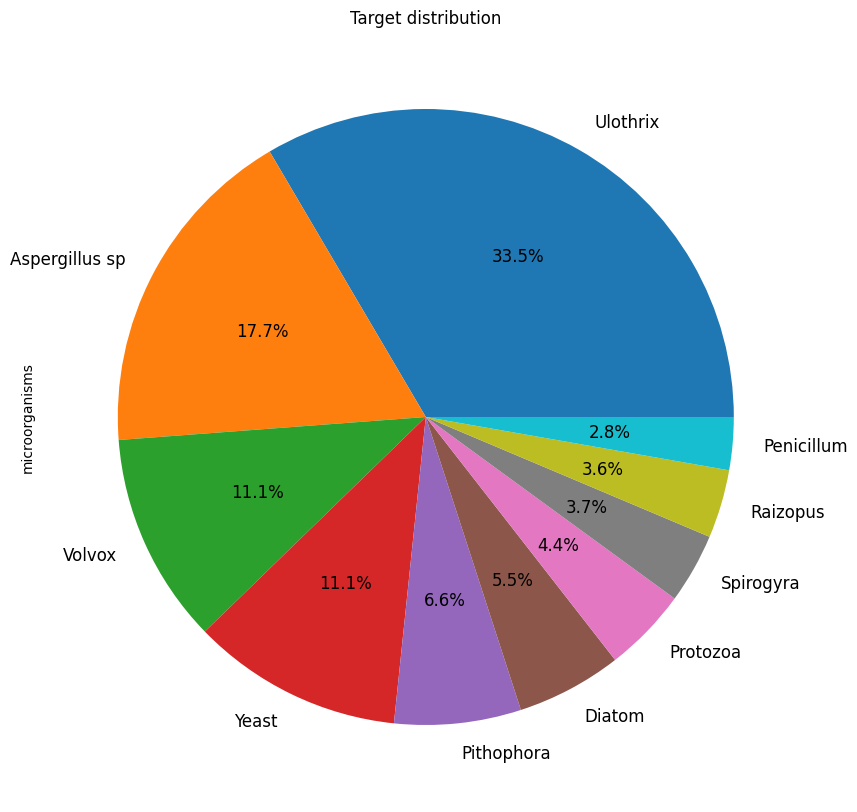

In [ ]:
plt.figure(figsize=(10,10))
# Pie plot
data['microorganisms'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution")

Label Encoding of microorganism feature

In [ ]:
encoder = LabelEncoder()
data['microorganisms'] = encoder.fit_transform(data['microorganisms'])

In [ ]:
data.head()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,10.90,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,6
1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,19.20,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,6
2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,10.20,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,6
3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,10.70,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,6
4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,1.22,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,6


Correlation between features

In [ ]:
sns.set(rc={'figure.figsize': (30, 30)})
_ = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, center=0).set(title='Correlations between features')

Data Split

In [ ]:
# X = data.iloc[:, :-1].values
# Y = data.iloc[:, -1].values

In [ ]:
X= data.drop('microorganisms',axis='columns')
Y= data['microorganisms']

In [ ]:
Y.value_counts()

7    1631
0     864
8     540
9     540
3     324
1     270
4     216
6     179
5     175
2     135
Name: microorganisms, dtype: int64

Using smote to balance the imbalance data

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, Y_sm = smote.fit_resample(X,Y)
Y_sm.value_counts()

6    1631
8    1631
3    1631
9    1631
5    1631
2    1631
0    1631
4    1631
1    1631
7    1631
Name: microorganisms, dtype: int64

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size = 0.20, random_state = 5, stratify=Y_sm)

In [ ]:
print(X_train)

[[ 0.73709181  0.58347896  0.12459059 ... -0.39796443 -0.10452246
   0.04632708]
 [-1.39304704  0.95644844  1.35866031 ...  1.10063188  1.0068239
   0.29878944]
 [ 0.62062    -1.25884964 -0.42685108 ... -1.06887356 -0.37142756
  -0.98992137]
 ...
 [ 1.17624344 -0.94020214 -0.22382522 ... -0.19132576 -0.30105275
  -0.02299411]
 [ 0.25243855  0.86169501  0.35977174 ... -1.18913562  0.05430874
   1.06962384]
 [-1.54748362  0.81959785  0.34502456 ... -0.73333045  0.03636255
   0.76745903]]


Features Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

#for visitors with patient feature
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [ ]:
values= [RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

keys= ['RandomForsetClassifier',
      'KNeighborsClassifier',
       'LogisticRegression',
       'DecisionTreeClassifier',
       'GaussianNB']

models= dict(zip(keys,values))
accuracy_scores=[]
train_times=[]

for key,value in models.items():
  t = time()
  value.fit(X_train,Y_train)
  duration = (time() - t) / 60
  Y_pred= value.predict(X_test)
  accuracy= accuracy_score(Y_test, Y_pred)
  accuracy_scores.append(accuracy)
  train_times.append(duration)
  print(key)
  print(round(accuracy * 100, 2))

RandomForsetClassifier
88.01
KNeighborsClassifier
83.45


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
50.03
DecisionTreeClassifier
73.02
GaussianNB
23.24


In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 238, max_depth=18, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

In [ ]:

param_dist = {'n_estimators': randint(50, 500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(classifier,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=18,
                                                    n_estimators=238,
                                                    random_state=0),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5169c45870>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5169c66860>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 202}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 202, max_depth=16, criterion = 'entropy',random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=202,
                       random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

In [ ]:
# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.68%


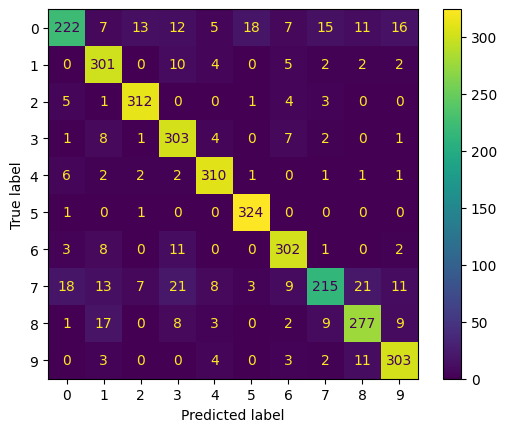

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

XG Boost

In [ ]:
# Define the XGBoost classifier and set hyperparameters
model = xgb.XGBClassifier(
    max_depth=3,
    n_estimators=1000,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=10,
    random_state=42
)

In [ ]:
# Fit the model to the training data
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_class=10,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.38%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print(model.feature_importances_)

[0.05460461 0.05325981 0.0448666  0.02636362 0.05276935 0.03822639
 0.02767118 0.05691626 0.02831107 0.02404075 0.02968542 0.03353745
 0.02761566 0.         0.02990222 0.02630359 0.03877863 0.03728856
 0.06530401 0.13105828 0.02532838 0.02550505 0.03551458 0.08714855]


In [ ]:
# plot feature importance
plot_importance(model)
pyplot.show()

In [ ]:
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)


In [ ]:
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = xgb.XGBClassifier(
    max_depth=3,
    n_estimators=1000,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=10,
    random_state=42
                                    )
  selection_model.fit(select_X_train, Y_train)
  # eval model
  select_X_test = selection.transform(X_test)
  y_pred = selection_model.predict(select_X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=24, Accuracy: 85.38%
Thresh=0.024, n=23, Accuracy: 85.38%
Thresh=0.025, n=22, Accuracy: 85.68%
Thresh=0.026, n=21, Accuracy: 85.53%
Thresh=0.026, n=20, Accuracy: 84.06%
Thresh=0.026, n=19, Accuracy: 84.27%
Thresh=0.028, n=18, Accuracy: 83.51%
Thresh=0.028, n=17, Accuracy: 83.08%
Thresh=0.028, n=16, Accuracy: 82.10%
Thresh=0.030, n=15, Accuracy: 81.91%
Thresh=0.030, n=14, Accuracy: 82.10%
Thresh=0.034, n=13, Accuracy: 79.46%
Thresh=0.036, n=12, Accuracy: 78.08%
Thresh=0.037, n=11, Accuracy: 78.02%
Thresh=0.038, n=10, Accuracy: 77.90%
Thresh=0.039, n=9, Accuracy: 76.15%
Thresh=0.045, n=8, Accuracy: 75.32%
Thresh=0.053, n=7, Accuracy: 75.11%
Thresh=0.053, n=6, Accuracy: 74.00%
Thresh=0.055, n=5, Accuracy: 69.93%
Thresh=0.057, n=4, Accuracy: 66.22%
Thresh=0.065, n=3, Accuracy: 61.28%
Thresh=0.087, n=2, Accuracy: 56.19%
Thresh=0.131, n=1, Accuracy: 28.02%


In [ ]:
# Use feature selection to select the most important features
selector = SelectFromModel(model, threshold=0.025, prefit=True)
X_train_new_1 = selector.transform(X_train)
X_test_new_1 = selector.transform(X_test)

# Fit the model to the selected features
model.fit(X_train_new_1, Y_train)
y_pred = model.predict(X_test_new_1)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

SVM

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)# check performance
#print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))
#print('F1 score:',f1_score(Y_test, svc_predict))

Accuracy score: 0.6468424279583078


MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
clf = MLPClassifier(hidden_layer_sizes=1000,random_state=1, max_iter=1000).fit(X_train, Y_train)

clf_predict = clf.predict(X_test)# check performance


In [ ]:
print('Accuracy score:',accuracy_score(Y_test, clf_predict))

Accuracy score: 0.8957694665849172


In [ ]:
estimators = np.arange(250, 1250, 250)
ave_num = 1
from sklearn.ensemble import GradientBoostingClassifier

# Full Dataset
f_accuracy = np.zeros_like(estimators, dtype=float)
f_times = np.zeros_like(estimators, dtype=float)
print("Full Dataset")
for i in range(ave_num):
  for e in range(len(estimators)):
    print(e)
    tic = time()
    grad_boost = GradientBoostingClassifier(n_estimators=estimators[e],
                                            learning_rate=0.1,
                                            max_depth=3,
                                            random_state=0)
    grad_boost.fit(xf_train, yf_train)
    yf_pred = grad_boost.predict(xf_test)
    f_times[e] = f_times[e] + toc
    accuracy = accuracy_score(yf_test, yf_pred)
    f_accuracy[e] = f_accuracy[e] + accuracy
    # print("e:", e, ", Accuracy:", '{:.3f}'.format(accuracy), "time:", '{:.3f}'.format(toc))
for e in range(len(estimators)):
  f_times[e] = f_times[e]/ave_num
  f_accuracy[e] = f_accuracy[e]/ave_num

Full Dataset
0


NameError: ignored